In [86]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [85]:
import scipy
import scipy as sp
import scipy.stats
from scipy import stats

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

def geomean_confidence_interval(data, confidence=0.95):
    a = np.log(1.0*np.array(data))
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return np.exp(m), np.exp(m-h), np.exp(m+h)

# Mutational Load

The premise of the speed-fidelity tradeoff is that the outcome of competition between two viral strains will be determined by two opposing forces; the speed with which the genome can be replicated, and the error rate of that replication. The faster genome replication happens, the more errors that occur and the greater the mutational load. In this scenario an optimal competitive fitness will be achieved exactly where the increase in fitness is counterbalanced by decrease in fitness from excess mutational load. Here we present a simple mathematical model to demonstrate this tradeoff, and fit the model to the experimental data.

We start with the classical estimation by Haldane (1937) of the equilibrium mean population fitness, $w$, as a function of the genomic deleterious mutation rate r'$U_d$' in units of deleterious mutations be genome per generation.


\begin{align}
w  = e^{-U_d}
\end{align}

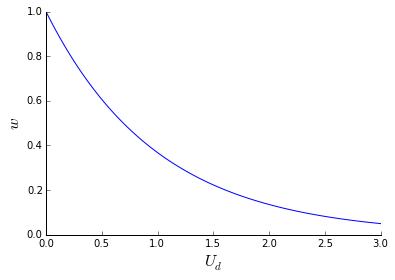

In [43]:
ax = subplot(111) 
Ud = np.linspace(0,3,100) # the deleterious mutation rate per genome per generation
mean_fit = np.exp(-Ud)    # the equilibrium mean population fitness  (Haldane 1937, Bull Sanjuan & Wilke 2007)
                          # not that if back mutations are allowed and the population is small this estimate m
                          # be off
plot(Ud, mean_fit)
xlabel('$\mathit{U}_d$',fontsize=16)
ylabel('$\mathit{w}$',fontsize=16)


simpleaxis(ax)


# Realive fitness

Now we consider competition between two strains that differ in both their speed, $c$, and the fidelity (as manifest by a deleterious mutation rate, $U$). If you have two strains, a and b, then you the relative fitness of a to b will be:



\begin{equation*}
w_{a,b}   = \frac{c_a e^{-U_a}}{ c_b e^{-U_b}}
\end{equation*}

where $c_a$ and $c_b$ are the replication rate of the genome and the $U_a$ and $U_b$ are the deleterious genomic mutation rates per genome per generation for strain a and b respectively.

In [44]:
#As an example, let's consider what happens when the a high fidelity variant 
# (i.e. lower mutation rate) results in a lower fitness (made up number similar 
# those that will be derived later)
Ua = 0.0745  # the mutation rate per genome per generation for strain a
Ub = 0.0308  # the mutation rate per genome per generation for strain b
wa = 1.   # replicative fitness of strain a (high mutation strain) unmutated
wb = 0.60  # replicative fitness of strain b (high fidelity strain) unmutated

fraction_deleterious = 0.9 # of all mutation, the fraction that are deleterious

# mean population fitness of population a at equilibrium
mean_wa = np.exp(-Ua)*wa

# mean population fitness of population a at equilibrium
mean_wb = np.exp(-Ub)*wb

print('the fitness of a is', mean_wa)
print('the fitness of b is', mean_wb)
print('the realtive fitness of b to a is', mean_wb/mean_wa)

the fitness of a is 0.928207474059
the fitness of b is 0.581801692549
the realtive fitness of b to a is 0.626801344321


# Considering an external mutagen

To understand the effect of a mutagen on the relative fitness of one strain to another, let's add a mutation rate multiplier (mu_external, $\sigma$) which mulitplicatively modifies the baseline mutation rate and constrain $\sigma$ to take values greater than one. 

\begin{equation*}
w_{a,b}   = \frac{c_a e^{-U_a * \sigma}}{ c_b e^{-U_b* \sigma}}
\end{equation*}

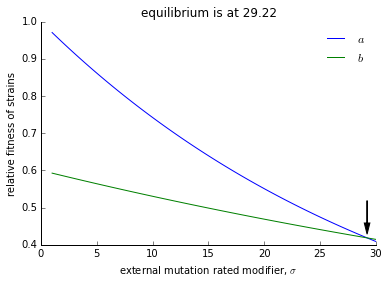

In [165]:
ax = subplot(111)
mu_external = np.linspace(1,30, 100) # sigma in the equatino above

# the relative fitness of a to b
fit_b = np.exp(-(Ub*fraction_deleterious)*mu_external)*wb
fit_a = np.exp(-(Ua*fraction_deleterious)*mu_external)*wa

ax.plot(mu_external, fit_a, label = '$a$')
ax.plot(mu_external, fit_b, label = '$b$')
#ax.plot([min(mu_external), max(mu_external)], [1,1], 'g--')

# find value of mu_external where relative fitness is 1
eq = np.log(wa/wb)/(fraction_deleterious*(Ua-Ub))

# put an arrow on the plot to make it very obvious
ax.arrow(eq, np.exp(-(Ub*fraction_deleterious)*eq)*wb+.1, 0, -0.06, head_width=0.5, head_length=0.03, fc='k', ec='k')


xlabel('external mutation rated modifier, $\sigma$')
ylabel('relative fitness of strains')
title('equilibrium is at {}'.format(str(eq)[:5]))
legend(loc = 'upper right', frameon=False)

simpleaxis(ax)

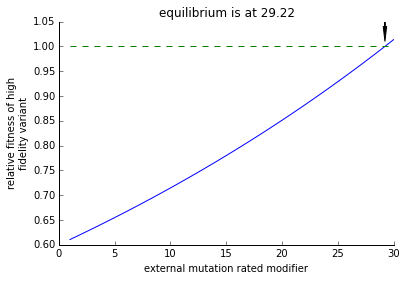

In [166]:
ax = subplot(111)
mu_external = np.linspace(1,30, 100) # sigma in the equatino above

# the relative fitness of a to b
relfit = (np.exp(-(Ub*fraction_deleterious)*mu_external)*wb)/(np.exp(-(Ua*fraction_deleterious)*mu_external)*wa)

ax.plot(mu_external, relfit)
ax.plot([min(mu_external), max(mu_external)], [1,1], 'g--')

# find value of mu_external where relative fitness is 1
eq = np.log(wa/wb)/(fraction_deleterious*(Ua-Ub))

# put an arrow on the plot to make it very obvious
ax.arrow(eq, 1.2, 0, -0.16, head_width=0.3, head_length=0.03, fc='k', ec='k')


xlabel('external mutation rated modifier')
ylabel('relative fitness of high\nfidelity variant')
title('equilibrium is at {}'.format(str(eq)[:5]))

simpleaxis(ax)

# Using the model to estimate mutational load from data

With this simple model, we want to use the empirical estimates of the mutation rate and the relative fitness values to etimate the deleterious mutation rate and the amount of mutation load experienced by wild type polio virus and the G64S high fidelity variant. We will start by enterring and plotting the mutation rate data.

wt
slope = 2.93219047619e-07
intercept = 1.34933333333e-05
r_value = 0.857289273159
r_square = 0.734944897873
p_value = 0.000365037572241
-46.0179290633

G64S
slope = 4.9619047619e-08
intercept = 3.43333333333e-06
r_value = 0.875145876319
r_square = 0.765880304839
p_value = 0.000193055796405
-69.1938579655


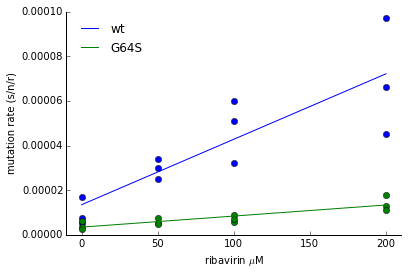

In [66]:
#experimental data listed as mutations per site per replication (s/n/r)
r_0_wt = [1.70E-05,7.60E-06,5.20E-06]
r_0_g64S = [3.60E-06,2.50E-06,6.20E-06]
r_50_wt = [3.00E-05,2.50E-05,3.40E-05]
r_50_g64S = [5.10E-06,7.60E-06,4.90E-06]
r_100_wt = [3.20E-05,5.10E-05,6.00E-05]
r_100_g64S = [5.80E-06,8.70E-06,6.90E-06]
r_200_wt =[4.50E-05,6.60E-05,9.70E-05]
r_200_g64S = [1.80E-05,1.30E-05,1.10E-05]
all_data = [[0,1.70E-05,7.60E-06,5.20E-06,9.93E-06,3.60E-06,2.50E-06,6.20E-06,4.10E-06],
[50,3.00E-05,2.50E-05,3.40E-05,2.97E-05,5.10E-06,7.60E-06,4.90E-06,5.87E-06],
[100,3.20E-05,5.10E-05,6.00E-05,4.77E-05,5.80E-06,8.70E-06,6.90E-06,7.13E-06],
[200,4.50E-05,6.60E-05,9.70E-05,6.93E-05,1.80E-05,1.30E-05,1.10E-05,1.40E-05]]

x= []
wt_all = []
g64s_all = []
for i in all_data:
    
    for j in range(1,4):
        x.append(i[0])
        wt_all.append(i[j])
    for j in range(5,8):
        g64s_all.append(i[j])
        
ax = subplot(1,1,1)
ax.plot(x, wt_all, 'bo')
ax.plot(x, g64s_all, 'go')
#ax.set_yscale('log')

wt_slope, wt_intercept, wt_r_value, wt_p_value, wt_std_err = stats.linregress(x,wt_all)
print ('wt')
print ('slope =', wt_slope)
print ('intercept =', wt_intercept)
print ('r_value =', wt_r_value)
print ('r_square =', wt_r_value**2)
print ('p_value =', wt_p_value)
print (-wt_intercept/wt_slope)
x2 = linspace(np.min(x),np.max(x),50)
y2 = x2*wt_slope+wt_intercept
plot(x2, y2, 'b', label = 'wt')
#plot(time, s, 'go')

print ()
G64S_slope, G64S_intercept, G64S_r_value, G64S_p_value, G64S_std_err = stats.linregress(x,g64s_all)
print ('G64S')
print ('slope =', G64S_slope)
print ('intercept =', G64S_intercept)
print ('r_value =', G64S_r_value)
print ('r_square =', G64S_r_value**2)
print ('p_value =', G64S_p_value)
print (-G64S_intercept/G64S_slope)
x1 = linspace(np.min(x),np.max(x),50)
y1 = x2*G64S_slope+G64S_intercept
plot(x1, y1, 'g', label = 'G64S')


legend(loc = 'upper left', frameon=False)
ax.set_xlim([-10, 210])
ax.set_xlabel('ribavirin $\\mu$M')
ax.set_ylabel('mutation rate (s/n/r)')

simpleaxis(ax)

The G64S mutation has two effects. The mutation results in an increase in fidelity, represented as a downward shift in the line. The mutation also results in a relative resistance to ribavirin, which is seen as a decreased slope. Both of these need to be included to estimate the mutational load experienced bt the wt and g64s mutant in the presence if increaseing mutagen.

Now let's solve for the two variables that are unknow (1) the number of deleterious sites in the genome ($n$), and  (2) the fitness cost ($c$) of the G64S mutation in the abscensce of mutational load, which is relative to the wild type which will arbitrarily be set to 1.  There are two unknwown variables, so we need two equations to solve. We will use the measured relative fitness with in the absence of ribavirin, and the ribavirin concentrationwhen the relative fitness is expected to be 1. 

We will used the the mutaion rates estimated for each strain and ribavirin concerntration  ($\mu_{strain, conc}$). At 0 ribavirin, and the reative fitness of G64S to wt which was measured to be 0.67 which give use our first equation:

\begin{equation*}
\frac{c*e^{-\mu_{G64S, 0}*n}}{ e^{-\mu_{wt, 0}*n}} = 0.67
\end{equation*}

Next we look at the competitive fitness use the measured point at which the two strains have equal fitness is approxiamtely 150 $\mu$M of ribavirin: 

\begin{equation*}
\frac{c*e^{-\mu_{G64S, 150}*n}}{ e^{-\mu_{wt, 150}*n}} = 1.0
\end{equation*}

Now with two equations we can solve for the two unknown values ($n$ and $c$).





In [168]:
ribavirin_conc = np.linspace(0,200, 100)
wt_mut_rate = (ribavirin_conc*wt_slope+wt_intercept) # 
G64S_mut_rate = (ribavirin_conc*G64S_slope+G64S_intercept)

eq_conc = 150# the ribavirin concentration at which the fitnesses are equal

c = np.exp((np.log(1/0.67)*((eq_conc*G64S_slope+G64S_intercept)-(eq_conc*wt_slope+wt_intercept)))/(G64S_intercept-wt_intercept - (eq_conc*G64S_slope+G64S_intercept)+(eq_conc*wt_slope+wt_intercept)))

# now this can be plugged into the equations to estimated the number of sites with deleterious mutations

n_del_site = (np.log((1/0.67)*c)/(G64S_intercept-wt_intercept)) 

mu_G64S_eq = eq_conc*G64S_slope+G64S_intercept
mu_wt_eq = eq_conc*wt_slope+wt_intercept
n = (np.log(0.67)/(mu_G64S_eq-mu_wt_eq))/(1-(G64S_intercept - wt_intercept)/(mu_G64S_eq-mu_wt_eq))

mean_fit_wt = np.exp(-wt_mut_rate*n_del_site)
mean_fit_G64S = c*np.exp(-G64S_mut_rate*n_del_site)
relfit = mean_fit_G64S/mean_fit_wt

#ax = subplot(111)
#ax.plot([min(ribavirin_conc), max(ribavirin_conc)], [1,1], 'g--')
#ax.plot(ribavirin_conc, relfit)


#xlabel('ribavirin $\\mu$M')
#ylabel('relative fitness(G64S/wt)')

#simpleaxis(ax)

print('Assuming they have equal fitness at', eq_conc, 'uM:')
print('(1) the fitness cost of G64S separate from the load is ', str(c)[:4])
print('(2) the effective number of sites with deleterious mutations is',int(n_del_site), '(', str(n_del_site/22500)[:4],'%)')
print('(3) the fitness cost due to mutation load experienced by wt in abscence of ribavirin is',1-np.exp(-1*wt_intercept*n_del_site))
print('(4) the fitness cost due to mutation load experienced by G64S in abscence of ribavirin is',1-np.exp(-1*G64S_intercept*n_del_site))

Assuming they have equal fitness at 150 uM:
(1) the fitness cost of G64S separate from the load is  0.60
(2) the effective number of sites with deleterious mutations is 10959 ( 0.48 %)
(3) the fitness cost due to mutation load experienced by wt in abscence of ribavirin is 0.137471101885
(4) the fitness cost due to mutation load experienced by G64S in abscence of ribavirin is 0.036930071953


/Users/robertwoods/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


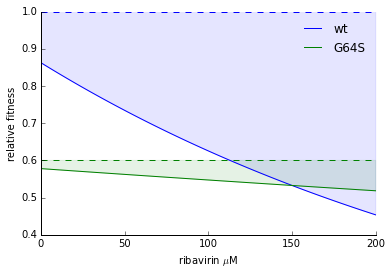

In [173]:
ax = subplot(111)
ax.plot(ribavirin_conc, mean_fit_wt, label = 'wt', color = 'blue')
ax.plot(ribavirin_conc, mean_fit_G64S, label = 'G64S', color = 'green')
ax.plot(ribavirin_conc, top_wt, 'b--')
ax.plot(ribavirin_conc, top_g64s,'g--')

top_wt = [1 for i in range(len(ribavirin_conc))]
top_g64s = [c for i in range(len(ribavirin_conc))]

ax.fill_between(ribavirin_conc,mean_fit_wt, top_wt, alpha = 0.1, color = 'blue')
ax.fill_between(ribavirin_conc,mean_fit_G64S, top_g64s, alpha = 0.1, color = 'green')

simpleaxis(ax)

legend(loc = 'upper right', frameon=False)

xlabel('ribavirin $\\mu$M')
ylabel('relative fitness')

# the dotted line indicate the predicted replicatino rate of wt adn G64S in the abscence of any
# muation load, the shaded areas indicate the amount of mutational load experienced by each 
# strain across the range of ribavirin concentration and the solid line is the relative fitness 
# of wt and G64S, compared to a wt strain that experiences no load, taking into account both
# replicative speed and mutation load

# Speed fidelity drade off and identifying an optimal mutation rate

Finally let's consider a tradeoff between replicative speed and fidelity. We do not know the functional relationship between these, but for the sake of demonstration, we can fit a line between G64S and wt.

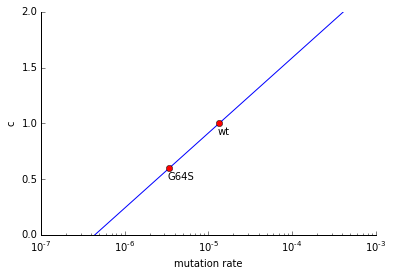

In [174]:
ax = subplot(111)

c_val = linspace(0,2,100) # a range of values of c
m = (np.log(wt_intercept)-np.log(G64S_intercept))/(1-c) # solve for the slop of the log function
b = np.log(G64S_intercept)-m*c # solve for the intercept of the log function
ax.plot(np.exp(c_val*m+b),c_val)

ax.plot(G64S_mut_rate[0],c, 'ro' )
ax.plot(wt_mut_rate[0],1, 'ro' )

ax.text(wt_mut_rate[0]*.96,.90, 'wt' )
ax.text(G64S_mut_rate[0]*.96,c-0.1, 'G64S' )

simpleaxis(ax)

xlabel('mutation rate')
ylabel('c')
ax.set_xscale('log')

In [175]:
# now look at at fitness as along this curve (as a function of c, given c's relationship with mu)
w = [np.exp(-np.exp(i*b+m)+n_del_site)*i for i in c_val]

/Users/robertwoods/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/Users/robertwoods/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


In [176]:
# finally lets plot the fitness as a function of the mutation rate

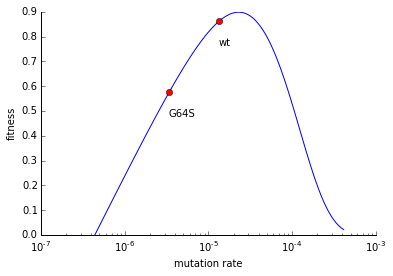

In [177]:
# now plot relative to the mutation rate
ax = subplot(1,1,1)
ax.plot(np.exp(c_val*m+b), np.exp(-np.exp(c_val*m+b)*n_del_site)*c_val)

ax.plot(np.exp(c*m+b), np.exp(-np.exp(c*m+b)*n_del_site)*c, 'ro' )
ax.text(np.exp(c*m+b), np.exp(-np.exp(c*m+b)*n_del_site)*c-0.1, 'G64S' )


ax.plot(np.exp(1*m+b), np.exp(-np.exp(1*m+b)*n_del_site)*1, 'ro' )
ax.text(np.exp(1*m+b), np.exp(-np.exp(1*m+b)*n_del_site)*1-0.1, 'wt' )


ax.set_xlabel('mutation rate')
ax.set_ylabel('fitness') 


simpleaxis(ax)

ax.set_xscale('log')
savefig('_optimum_speed.pdf',dpi = None)